In [8]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
geo_dataframe = gpd.read_file("../data/raw/illinois-counties.geojson")
era5 = pd.read_csv("../data/raw/ERA5.csv")
evi = pd.read_csv("../data/raw/EVI.csv")
evi_stacked = pd.read_csv("../data/raw/EVI_stacked.csv")
il_yield = pd.read_csv("../data/raw/IL_yield.csv")

The enhanced vegetation index (EVI) is an 'optimized' vegetation index designed to enhance the
vegetation signal with improved sensitivity in high biomass regions and improved vegetation
monitoring through a de-coupling of the canopy background signal and a reduction in atmosphere
influences.

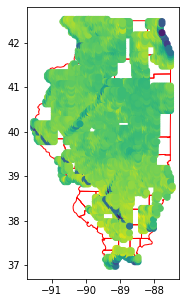

In [16]:
df_plot = evi_stacked[evi_stacked["year"] == 2019]
fig, ax = plt.subplots(figsize=(5, 5))
geo_dataframe.plot(ax=ax, facecolor='none', edgecolor='red')
plt.scatter(df_plot["long"], df_plot["lat"], c=df_plot["evi_1"])

In [30]:
geo_dataframe = gpd.read_file("../data/raw/illinois-counties.geojson")
era5 = pd.read_csv("../data/raw/ERA5.csv")
evi = pd.read_csv("../data/raw/EVI.csv")
evi_stacked = pd.read_csv("../data/raw/EVI_stacked.csv")
il_yield = pd.read_csv("../data/raw/IL_yield.csv")

def plot_evi_stacked_data(year, evi, figsize=8):
    """

    @param year:
    @param evi:
    @param figsize:
    @return:
    """
    df_plot = evi_stacked[evi_stacked["year"] == year]
    fig, ax = plt.subplots(figsize=(figsize, figsize))
    geo_dataframe.plot(ax=ax, facecolor='none', edgecolor='red')
    plt.scatter(df_plot["long"], df_plot["lat"], c=df_plot[evi])

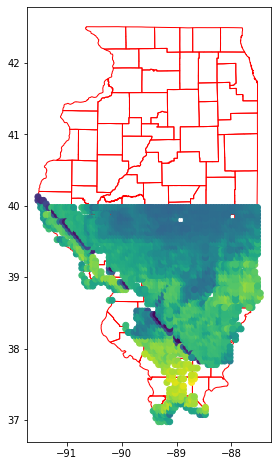

In [29]:
# Visualise 2010 evi 17
plot_evi_stacked_data(2010, "evi_17", figsize=8)

In [35]:
# Dictionary mean evi per evi_column
evi_columns = df_plot.columns[4:]
mean_evi_dict = dict()
for evi_column in evi_columns:
    temporary_series = df_plot[evi_column]
    mean_evi_dict[evi_column] = temporary_series.mean()


In [ ]:
# Create dataframe from dict
mean_evi_dataframe =  pd.DataFrame().from_dict(mean_evi_dict, orient="index")
mean_evi_dataframe.reset_index(inplace=True)
mean_evi_dataframe.columns = ["evi_interval", "evi"]
mean_evi_dataframe

['evi_1',
 'evi_17',
 'evi_33',
 'evi_49',
 'evi_65',
 'evi_81',
 'evi_97',
 'evi_113',
 'evi_129',
 'evi_145',
 'evi_161',
 'evi_177',
 'evi_193',
 'evi_209',
 'evi_225',
 'evi_241',
 'evi_257',
 'evi_273',
 'evi_289',
 'evi_305',
 'evi_321',
 'evi_337',
 'evi_353']

In [109]:
EVI_COLUMNS = list(evi_stacked.columns[4:])
EVI_INTERVAL_COLUMN = "evi_interval"
EVI_COLUMN = "evi"

def get_mean_evi_dictionary(dataframe):
    """
    Function returns dataframe showing mean interval EVI
    @param dataframe: stacked_evi dataframe
    @return: dictionary containing evi interval and evi mean
    """
    mean_evi_dict = dict()
    for evi_column in EVI_COLUMNS:
        temporary_series = dataframe[evi_column]
        mean_evi_dict[evi_column] = temporary_series.mean()
    return mean_evi_dict

def get_evi_dataframe_from_dictionary(dictionary):
    """

    @param dictionary:
    @return:
    """
    mean_evi_dataframe =  pd.DataFrame().from_dict(dictionary, orient="index")
    mean_evi_dataframe.reset_index(inplace=True)
    mean_evi_dataframe.columns = [EVI_INTERVAL_COLUMN, EVI_COLUMN]
    return mean_evi_dataframe

In [81]:
# Create dates for Evi interval
from datetime import datetime, timedelta

evi_1_date = "2019-01-01"
evi_1_date = datetime.strptime(evi_1_date, '%Y-%m-%d')

date_list = list()
date_list.append(evi_1_date)
current_evi_date = evi_1_date
for n in range(len(evi_columns)):
    date_more_16_days = (current_evi_date + timedelta(days=16))
    date_list.append(date_more_16_days)
    current_evi_date = date_more_16_days
date_list.pop(-1)

datetime.datetime(2020, 1, 4, 0, 0)

In [90]:
from datetime import datetime, timedelta
EVI_1_DATE = "2019-01-01"


def get_dates_from_evi_interval():
    """
    Function gets dates from evi interval
    @return: list of dates corresponding to evi interval
    """
    evi_1_date = datetime.strptime(EVI_1_DATE, '%Y-%m-%d')
    date_list = list()
    date_list.append(evi_1_date)
    current_evi_date = evi_1_date
    for n in range(len(evi_columns)):
        date_more_16_days = (current_evi_date + timedelta(days=16))
        date_list.append(date_more_16_days)
        current_evi_date = date_more_16_days
    date_list.pop(-1)
    return date_list

In [82]:
# Plotly EVI
import plotly.graph_objects as go
dates = list(mean_evi_dataframe["date"])
evis = list(mean_evi_dataframe["evi"])

fig = go.Figure()
fig.add_trace(go.Scatter(x=dates, y=evis, mode='lines+markers', name='Evi', marker_color="#003f5c"))
fig.update_layout(
    title = 'EVI Over Time',
    autosize = False,
    width = 950,
    height = 600,
    margin = dict(
        l = 50,
        r = 50,
        b = 50,
        t = 100,
        pad = 2
    ),
    template = "plotly_white",
    hovermode='x'
)
fig.show()

In [132]:
evi_stacked_years = list(evi_stacked["year"].unique())
dates = get_dates_from_evi_interval()
written_dates = [x.strftime('%b-%d') for x in dates]

fig = go.Figure()
for year in evi_stacked_years:
    temporary_dataframe = evi_stacked[evi_stacked["year"] == year]
    mean_evi_dict = get_mean_evi_dictionary(temporary_dataframe)
    mean_evi_dataframe = get_evi_dataframe_from_dictionary(mean_evi_dict)
    evis = list(mean_evi_dataframe["evi"])
    fig.add_trace(go.Scatter(x=written_dates, y=evis, mode='lines+markers', name=str(year)))
# Dataframe average
mean_evi_dict = get_mean_evi_dictionary(evi_stacked)
mean_evi_dataframe = get_evi_dataframe_from_dictionary(mean_evi_dict)
evis = list(mean_evi_dataframe["evi"])
fig.add_trace(go.Scatter(x=written_dates, y=evis, mode='lines+markers', name="mean"))
fig.update_layout(
    title = 'EVI Over Time',
    autosize = False,
    width = 950,
    height = 600,
    margin = dict(
        l = 50,
        r = 50,
        b = 50,
        t = 100,
        pad = 2
    ),
    template = "plotly_white"
)
fig.write_html("../references/visualisations/evi_over_time.html")
fig.show()